#Bootstrap: What's the point?

I recently stumbled accross an interesting questions asked on Cross Validated [http://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works]

The Original Poster remarked that although they had spend hours understanding how to perform statistical boostrapping they were unable to answer a question by a client on why bootstrapping works.

**Their Questions**
"...if we are resampling from our sample, how is it that we are learning something about the population rather than only about the sample? There seems to be a leap there which is somewhat counter-intuitive."



#Answer

###Why Resample

Say you want to find out information on a population. Analyzing the entire population may be infeasable for any number of reasons, so you need to take a sample and infer population statistics from sample statistics. 

###Conventional resampling

One way you might learn about this is to take samples from the population again and again.

Imagine you decide to make assumptions, e.g. that it is Normal, or Bernoulli or some other convenient fiction. Making this assumption allows you to understand what part of the population data your sample data encompasses. 

This seems like a good idea provided you are happy with the assumptions you made about the population. (It's distribution, e.g. Normal, Poisson, and the parameters)

####Let us look at an example...

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ggplot
%matplotlib inline

Sample Size = 100
Sample Mean = 99
Sample Standard Deviation = 10


<function matplotlib.pyplot.show>

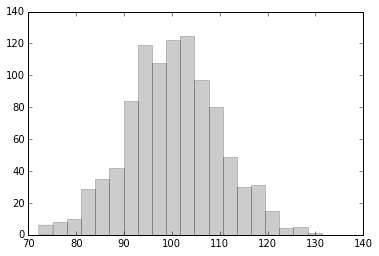

In [32]:
# Building the sample and plotting
sample = np.random.normal(loc = 100, scale = 10, size = 100)
n, bins, patches = plt.hist(population, bins = 20, alpha = .2, color = "black") 
sample_mean = np.mean(sample)
sample_stdev = np.std(sample)
sample_size = np.size(sample)
print("Sample Size = %d" % sample_size)
print("Sample Mean = %d" % sample_mean)
print("Sample Standard Deviation = %d" % sample_stdev)

plt.show

Oh man this is great...my sample looks like it follows a normal distribution with: mean = 100, and standard deviation on 10. So I'll just resample from a population population with those parameter values.

In [33]:
# Resampling based off my assumption on the population.
resample = np.random.normal(loc = 100, scale = 10, size = 100)

**But...Imagine you are not ok with assumptions.**

###Bootstrapping

An alternative is to take the sample you have and keep resampling from it. You can do this because the sample you have can be considered a very small discrete population. Sampling 'with replacement' is just a convenient way to treat the sample like it's a population and to sample from it in a way that reflects its shape (distribution and parameters).

This is a reasonable thing to do because:

1) The sample you have is the only data you have; and,

2) If sampled correctly (truly random), it should reflect the population.



In [38]:
sample = np.random.normal(loc = 100, scale = 10, size = 20)

def bootstrap_Resampling(X, n=None, n_samples = 1):
    '''
    X = array to resample
    n = length of resample
    n_sampled = number of times to resample
    '''    
    for n_sample in np.arange(1,n_samples + 1):
        if n == None:
            n = len(X)

        resample_indeces = np.floor(np.random.rand(n)*len(X)).astype(int)
        resampled_data = X[resample_indeces]
        resampled_data = pd.DataFrame({'data' : resampled_data, 'sample_n' : n_sample})

        if n_sample == 1:
            all_resampled_data = resampled_data
        else:
            all_resampled_data = all_resampled_data.append(resampled_data)
    
    return(all_resampled_data)
    
bootstrap_Resampling(sample, n = 10, n_samples = 2)


,data,sample_n
0,107.509402,1
1,93.075055,1
2,92.910926,1
3,92.243227,1
4,101.388975,1
5,92.910926,1
6,101.388975,1
7,107.509402,1
8,111.420656,1
9,89.299727,1


###But why do I need to resample from the sample If I have all of the sample data? 

**The problem Bootstrapping is trying to solve***
Remember when we said we're not comfortable making assumptions about the population? That means that we don't know what the population looks like and we aren't able to measure sampling error.

**The solution**
Alas, because of bootstrapping we are now treating our sample like a population so by resampling from it we can learn sampling error.

###When is this most useful?? Well here is what wikipedia says:

When the theoretical distribution of a statistic of interest is complicated or unknown. Since the bootstrapping procedure is distribution-independent it provides an indirect method to assess the properties of the distribution underlying the sample and the parameters of interest that are derived from this distribution.

When the sample size is insufficient for straightforward statistical inference. If the underlying distribution is well-known, bootstrapping provides a way to account for the distortions caused by the specific sample that may not be fully representative of the population.

When power calculations have to be performed, and a small pilot sample is available. Most power and sample size calculations are heavily dependent on the standard deviation of the statistic of interest. If the estimate used is incorrect, the required sample size will also be wrong. One method to get an impression of the variation of the statistic is to use a small pilot sample and perform bootstrapping on it to get impression of the variance.


###Calculating Bootstrapped Confidence Interval

In [ ]:
np.random.normal(loc = 100, scale = 10, size = 20)
cis = boot.ci( (x,y), statfunction=stats.linregress )